# Proyek Unsupervised Learning: Bank Transaction Dataset for Fraud Detection

**Dataset Source:**

> https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection

Sumber awal data saya menggunakan Bank Transaction for Fraud Detection. Selanjutnya data tersebut saya gunakan untuk clustering untuk menentukan cluster mana yang akan saya gunakan untuk label yang berpotensi fraud. Dataset tersebut yang saya gunakan pada project ini.

# **1. Import Library**

Saya mengimpor berbagai library Python yang dibutuhkan untuk proses analisis data dan pembangunan model machine learning, mulai dari manipulasi data (NumPy, Pandas), visualisasi (Matplotlib, Seaborn), preprocessing dan reduksi dimensi (StandardScaler, PCA), hingga pemodelan klasifikasi (Random Forest, Logistic Regression), evaluasi model, tuning hyperparameter (GridSearchCV), serta melakukan clustering dengan KMeans dan pembagian data menggunakan train-test split.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files
import warnings
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame. Dataset bernama "Dataset_inisiasi.csv" yang merupakan dataset hasil dari project Clustering sebelumnya.

In [3]:
file_path = "Dataset_inisiasi.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Label
0,-26.050139,70.106437,81.609851,1.124602,5106.925758,0.773006,0.022349,0.328659,0.249343,0
1,459.411187,68.097336,141.705651,1.124602,13797.291182,0.773006,0.024540,0.328659,0.249343,0
2,124.353729,18.874361,56.569934,1.124602,1096.917155,0.773006,0.024540,0.321648,0.261613,1
3,202.384113,25.906215,25.520437,1.124602,8581.232686,0.773006,0.024102,0.321648,0.261613,0
4,-26.908058,25.906215,198.796662,1.124602,7435.817457,0.226994,0.024978,0.321648,0.261613,1


In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Label
count,2282.000000,2282.000000,2282.000000,2.282000e+03,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000
mean,297.593778,44.673965,119.643312,1.124602e+00,5114.302966,0.649065,0.023559,0.333759,0.250242,0.390009
std,291.952103,17.792555,69.965161,1.776746e-14,3901.020791,0.228768,0.002540,0.012024,0.007803,0.487859
min,-44.589225,17.869810,10.496487,1.124602e+00,70.660649,0.226994,0.016214,0.321648,0.239702,0.000000
25%,59.416658,26.910765,63.581111,1.124602e+00,1492.012342,0.773006,0.021911,0.321648,0.249343,0.000000
50%,220.903092,44.992674,111.657751,1.124602e+00,4755.359285,0.773006,0.024102,0.328659,0.249343,0.000000
75%,459.431294,59.056381,161.737585,1.124602e+00,7649.320219,0.773006,0.025416,0.349693,0.261613,1.000000
max,1165.786572,80.151942,300.959523,1.124602e+00,15022.527478,0.773006,0.027607,0.349693,0.261613,1.000000


Dataset yang digunakan sudah berbentuk numerik semua yaitu float64 atau int64, sehingga saya tidak perlu melakukan LabelEncoder.

In [6]:
# Cek jumlah data per cluster
cluster_counts = df["Label"].value_counts()

# Cek apakah ada nilai yang hilang dalam dataset
missing_values = df.isnull().sum()

cluster_counts, missing_values

(Label
 0    1392
 1     890
 Name: count, dtype: int64,
 TransactionAmount      0
 CustomerAge            0
 TransactionDuration    0
 LoginAttempts          0
 AccountBalance         0
 TransactionType        0
 Location               0
 Channel                0
 CustomerOccupation     0
 Label                  0
 dtype: int64)

# **3. Data Splitting**

Pada tahap ini, saya melakukan pemisahan dataset menjadi dua bagian, yaitu data latih (training set) dan data uji (test set) menggunakan metode stratified split agar distribusi label antara fraud dan non fraud. Dengan ketentuan dimana Fraud menggunakan label 1 dan juga non Fraud dengan label 0.

In [7]:
# Menentukan fitur (X) dan label (y)
X = df.drop(columns=["Label"])
y = df["Label"]  # Label sudah 1 untuk fraud dan 0 untuk non-fraud

# Membagi dataset untuk training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Menampilkan jumlah data di masing-masing set
print(X_train.shape, X_test.shape)
print(y_train.value_counts(), y_test.value_counts())

(1825, 9) (457, 9)
Label
0    1113
1     712
Name: count, dtype: int64 Label
0    279
1    178
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**

## **a. Membangun Model Klasifikasi**

Memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Setelah menentukan label berdasarkan hasil clustering, saya melanjutkan dengan melatih model klasifikasi menggunakan data latih. Pada proyek ini, saya memilih dua algoritma utama yaitu Random Forest dan Logistic Regression, termasuk versi yang telah di-tuning menggunakan GridSearchCV. Kedua model tersebut dilatih pada data latih untuk mempelajari pola yang membedakan transaksi fraud (cluster 1 dan 3) dan non-fraud (cluster 0 dan 2), guna digunakan dalam prediksi data uji.

In [8]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [9]:
# Pelatihan Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [10]:
# Prediksi kedua model
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

**1️⃣ Random Forest (RF)**

**Penjelasan Algoritma**
Random Forest adalah algoritma ensemble learning yang terdiri dari banyak Decision Tree. Algoritma ini bekerja dengan membangun beberapa pohon keputusan dari sampel acak dalam dataset, lalu menggabungkan hasil prediksi dari semua pohon tersebut untuk membuat keputusan akhir berdasarkan voting mayoritas (untuk klasifikasi).  

 **Alasan pemilihan algorima ini**  
- RF mengurangi risiko overfitting dan memberikan hasil yang lebih stabil dibandingkan Decision Tree tunggal.  
- Algoritma ini bekerja dengan baik pada dataset dengan dimana hubungan kompleks antar variabel.  
- RF cukup tahan terhadap ketidakseimbangan kelas.  
- Tidak terlalu sensitif terhadap outlier karena adanya pengacakan dalam proses pembentukan pohon.  



---


**2️⃣ Logistic Regression (LR)**

**Penjelasan Algoritma**
Logistic Regression (LR) adalah algoritma klasik dalam machine learning yang digunakan untuk klasifikasi biner. Berbeda dengan Random Forest yang berbasis pohon keputusan, Logistic Regression bekerja dengan menggunakan fungsi sigmoid untuk memprediksi probabilitas sebuah data masuk ke dalam kelas tertentu.  

 **Alasan pemilihan algorima ini**
- Sederhana, model ini membantu saya memahami bagaimana setiap variabel memengaruhi prediksi.  
- Logistic Regression lebih cepat dibandingkan RF dalam pelatihan dan prediksi.  
- Tidak mudah overfitting jika data bersih dan terstruktur dengan baik.  
- Bisa membandingkan kinerja model sederhana dengan model yang lebih kompleks seperti Random Forest.  



---


**Kesimpulan**
1. Random Forest memberikan akurasi tinggi dan stabil dalam mendeteksi transaksi fraud, terutama jika pola agak kompleks dan sulit ditangkap oleh model linear.  
2. Logistic Regression sebagai baseline model yang cepat dan interpretable, membantu memahami bagaimana setiap fitur berkontribusi dalam menentukan apakah suatu transaksi adalah fraud atau bukan.  


---


**Pengerjaan Project**  
- Menggunakan Logistic Regression untuk mendapatkan gambaran awal performa model sederhana.  
- Menggunakan Random Forest untuk meningkatkan akurasi dan menangkap pola yang lebih kompleks.  
- Kemudian melakukan tuning hyperparameter untuk mendapatkan performa terbaik dari kedua model.  

## **b. Evaluasi Model Klasifikasi**

Beberapa tahapan yang dilakukan pada bagian ini.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [11]:
# Fungsi Evaluasi Model dengan Heatmap Confusion Matrix
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Menampilkan Metrik Evaluasi dalam Format yang Rapi
    print(f"\n{'='*40}")
    print(f"Algoritma Model: {model_name}")
    print(f"{'='*40}")
    print(f"1. Accuracy  : {accuracy:.4f}")
    print(f"2. F1 Score  : {f1:.4f}")
    print(f"3. Precision : {precision:.4f}")
    print(f"4. Recall    : {recall:.4f}")
    print(f"{'='*40}")

    # Plot Confusion Matrix dengan Heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()


Algoritma Model: Random Forest
1. Accuracy  : 0.9672
2. F1 Score  : 0.9568
3. Precision : 0.9822
4. Recall    : 0.9326


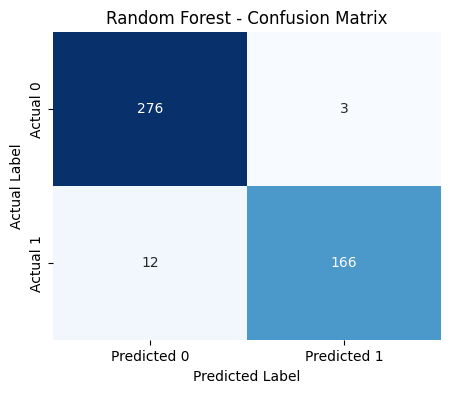


Algoritma Model: Logistic Regression
1. Accuracy  : 0.9956
2. F1 Score  : 0.9944
3. Precision : 0.9944
4. Recall    : 0.9944


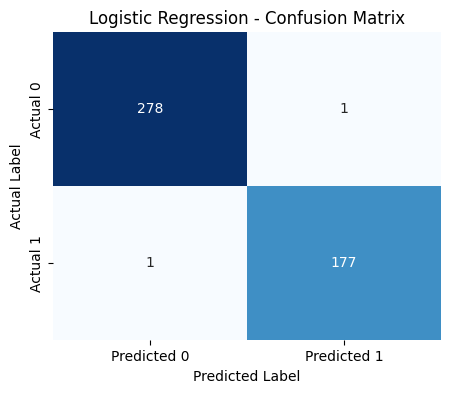

In [12]:
# Evaluasi Model Sebelum Tuning
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

- Analisis Perbandingan

Logistic Regression unggul di semua metrik evaluasi dibandingkan Random Forest. Dengan Accuracy, F1 Score, Precision, dan Recall yang semuanya berada di atas 99%, model ini sangat konsisten dalam memprediksi kelas fraud maupun non-fraud.

Random Forest memiliki performa yang juga sangat baik, terutama pada Precision (98.22%), yang menunjukkan bahwa model ini sangat jarang memberikan false positive (transaksi yang sebenarnya bukan fraud namun diprediksi sebagai fraud).

Namun, Recall Random Forest lebih rendah (93.26%), artinya masih ada sebagian kasus fraud yang tidak terdeteksi oleh model ini, sedangkan Logistic Regression berhasil mendeteksi lebih banyak kasus fraud.

- Kesimpulan

Meskipun Random Forest memiliki Precision tinggi, Logistic Regression menunjukkan performa yang lebih seimbang dan optimal secara keseluruhan. Oleh karena itu, Logistic Regression menjadi pilihan yang lebih direkomendasikan untuk diterapkan dalam sistem deteksi fraud pada kasus ini.

## **c. Tuning Model Klasifikasi (Optional)**

Menggunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [13]:
# Tuning Model dengan GridSearchCV
# Hyperparameter tuning untuk Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='f1')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Hyperparameter tuning untuk Logistic Regression
lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_params, cv=3, scoring='f1')
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Bagian ini dibagi menjadi 2 bagian yaitu:
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Algoritma Model: Tuned Random Forest
1. Accuracy  : 0.9672
2. F1 Score  : 0.9570
3. Precision : 0.9766
4. Recall    : 0.9382


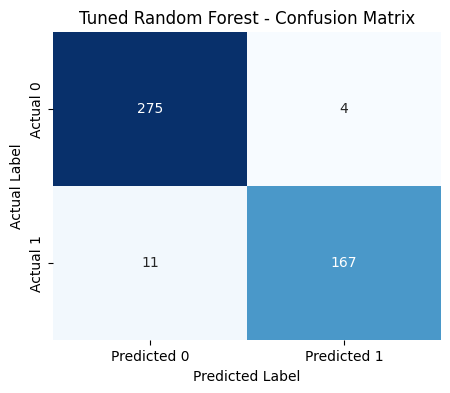


Algoritma Model: Tuned Logistic Regression
1. Accuracy  : 0.9956
2. F1 Score  : 0.9944
3. Precision : 0.9944
4. Recall    : 0.9944


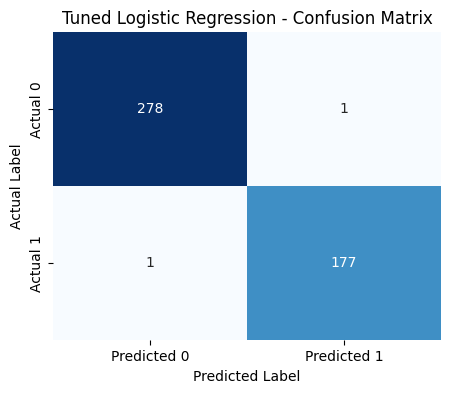

In [14]:
# Prediksi model setelah tuning
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_lr = best_lr.predict(X_test)

# Evaluasi Model setelah Tuning
evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")
evaluate_model(y_test, y_pred_best_lr, "Tuned Logistic Regression")

Setelah tuning, Random Forest mengalami sedikit peningkatan Recall namun sedikit penurunan Precision. Sementara itu, Logistic Regression menunjukkan performa optimal yang stabil di semua metrik, menjadikannya model terbaik secara keseluruhan.

Pada Random Forest, Recall meningkat dari 93.26% menjadi 93.82%, sementara pada Logistic Regression, semua metrik termasuk Accuracy, F1 Score, Precision, dan Recall tetap stabil di angka 99.44%, menunjukkan model ini sudah optimal bahkan sebelum tuning. Meskipun Precision pada Tuned Random Forest sedikit menurun dari 98.22% ke 97.66%.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Pada bagian ini beberapa hal yang saya lakukan adalah sebagai berikut ini:
1. Membandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.


Algoritma Model: Random Forest
1. Accuracy  : 0.9672
2. F1 Score  : 0.9568
3. Precision : 0.9822
4. Recall    : 0.9326


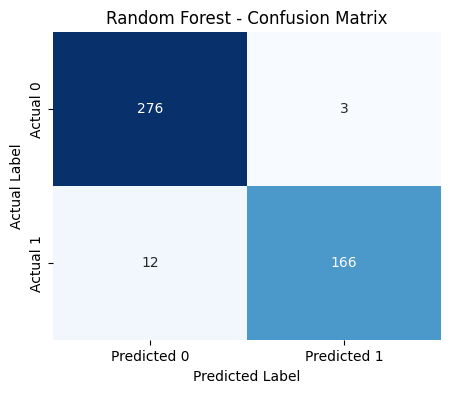


Algoritma Model: Logistic Regression
1. Accuracy  : 0.9956
2. F1 Score  : 0.9944
3. Precision : 0.9944
4. Recall    : 0.9944


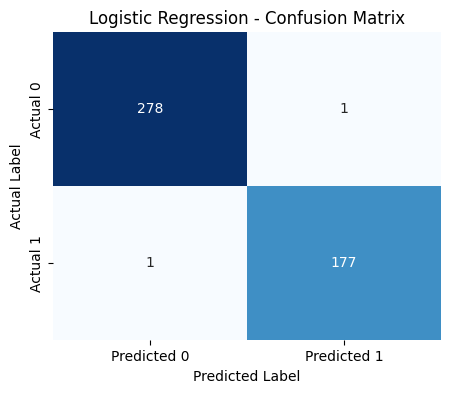


Algoritma Model: Tuned Random Forest
1. Accuracy  : 0.9672
2. F1 Score  : 0.9570
3. Precision : 0.9766
4. Recall    : 0.9382


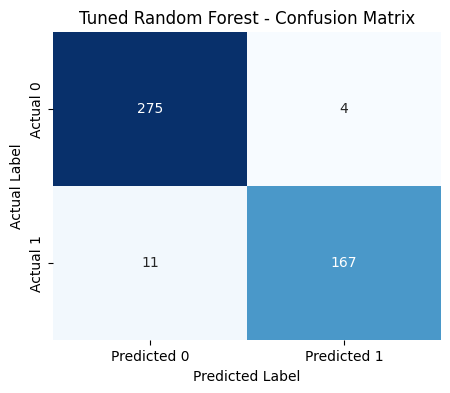


Algoritma Model: Tuned Logistic Regression
1. Accuracy  : 0.9956
2. F1 Score  : 0.9944
3. Precision : 0.9944
4. Recall    : 0.9944


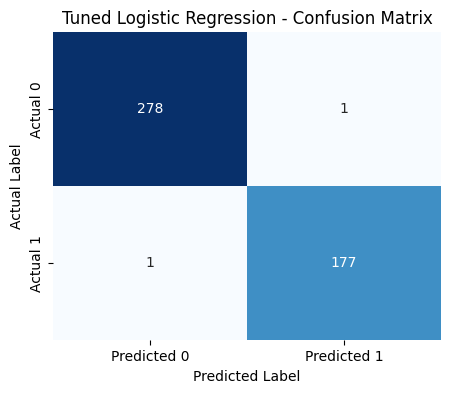

In [15]:
# Evaluasi Sebelum Tuning
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Evaluasi Setelah Tuning
evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")
evaluate_model(y_test, y_pred_best_lr, "Tuned Logistic Regression")

In [16]:
from IPython.display import display, Markdown
import pandas as pd

# Tabel hasil evaluasi model yang diperbarui sesuai data hasil terbaru
data = {
    "Model": [
        "Random Forest",
        "Tuned Random Forest",
        "Logistic Regression",
        "Tuned Logistic Regression"
    ],
    "Accuracy": [0.9672, 0.9672, 0.9956, 0.9956],
    "F1 Score": [0.9568, 0.9570, 0.9944, 0.9944],
    "Precision": [0.9822, 0.9766, 0.9944, 0.9944],
    "Recall": [0.9326, 0.9382, 0.9944, 0.9944]
}

df_results = pd.DataFrame(data)

# Menampilkan tabel hasil evaluasi model
display(Markdown("### **Hasil Evaluasi Model**"))
display(df_results)

### **Hasil Evaluasi Model**

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.9672,0.9568,0.9822,0.9326
1,Tuned Random Forest,0.9672,0.9570,0.9766,0.9382
2,Logistic Regression,0.9956,0.9944,0.9944,0.9944
3,Tuned Logistic Regression,0.9956,0.9944,0.9944,0.9944


# **5. Analisis Evaluasi Model**

**1. Perbandingan Hasil Sebelum dan Setelah Tuning**  
- **Random Forest** setelah tuning menunjukkan **sedikit peningkatan F1 Score dari 0.9568 ke 0.9570**, serta **peningkatan Recall dari 93.26% ke 93.82%**. Namun, **Precision** mengalami sedikit **penurunan dari 98.22% ke 97.66%.**
- **Logistic Regression** tidak mengalami perubahan metrik setelah tuning **(Accuracy, Precision, Recall, dan F1 Score tetap di 0.9956, 0.9944, 0.9944, dan 0.9944 secara berurutan)**. Hal ini menunjukkan bahwa tuning yang dilakukan tidak memberikan dampak besar, atau model tersebut sudah optimal dengan konfigurasi awal.
- **Accuracy** dari model sudah tinggi **(di atas 96% untuk semua model)**, dan tidak mengalami perubahan signifikan setelah tuning.
- Meskipun **Logistic Regression** memiliki metrik yang sangat tinggi secara keseluruhan, Tuned Random Forest **bisa digunakan sebagai algoritma yang dipilih karena** memiliki keseimbangan Precision dan Recall yang lebih fleksibel untuk kasus nyata.

---

**2. Identifikasi Kelemahan Model**  

**Kelemahan pada Precision dan Recall**
- **Random Forest** setelah tuning memiliki Precision yang sedikit menurun **(dari 0.9822 ke 0.9766)**, yang artinya ada sedikit peningkatan false positives. Namun hal ini diimbangi dengan **peningkatan Recall dari 93.26% ke 93.82%.**
- **Logistic Regression** memiliki performa yang sangat tinggi di semua metrik **(Precision, Recall, dan F1 Score = 0.9944)**, menunjukkan model ini sangat optimal dalam mendeteksi fraud tanpa banyak false positives atau false negatives.

**Overfitting atau Underfitting?**  
- **Tidak ada indikasi overfitting pada keempat model**, karena performansi stabil dan tidak ekstrem setelah tuning.
- **Logistic Regression menunjukkan konsistensi performa sebelum dan sesudah tuning**, menandakan bahwa model tersebut stabil terhadap perubahan parameter.
- **Random Forest juga menunjukkan performa yang konsisten dan baik**, mendeteksi fraud dengan recall tinggi namun tetap menjaga precision.

---

**3. Rekomendasi Tindakan Lanjutan**  
- **Menggunakan Logistic Regression (tuned atau tidak) sebagai baseline utama**, karena memiliki hasil paling tinggi dan stabil di seluruh metrik.
- **Tuned Random Forest bisa dipertimbangkan**, khususnya jika sistem membutuhkan model yang lebih toleran terhadap ketidakseimbangan data dan kompleksitas yang lebih tinggi.
- **Lakukan balancing data (undersampling/oversampling)** agar Precision dan Recall dapat ditingkatkan lebih lanjut, khususnya untuk model Random Forest.
- **Coba model lain seperti Gradient Boosting (XGBoost, LightGBM)** untuk mengetahui apakah ada peningkatan yang berarti dalam hal Precision tanpa mengorbankan Recall.
- **Perluas fitur dataset** dengan data kontekstual lain seperti waktu transaksi, lokasi pengguna, dan riwayat perilaku, untuk memperkuat akurasi model dalam mendeteksi fraud.

---

**Kesimpulan:**  
- Dari project ini, **Logistic Regression adalah model terbaik saat ini** berdasarkan hasil evaluasi yang tinggi dan konsisten.
- **Tuned Random Forest tetap menjadi alternatif yang baik**, khususnya dalam hal explainability dan penyesuaian terhadap ketidakseimbangan data.
- Dalam fraud detection, **Recall yang tinggi sangat penting** karena lebih baik mendeteksi fraud meskipun dengan risiko false positive yang sedikit lebih tinggi.
- **Precision bisa ditingkatkan** di langkah selanjutnya dengan metode balancing atau feature engineering lanjutan.